<a href="https://colab.research.google.com/github/TAKE-JP-17/Pytorch/blob/main/1dheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

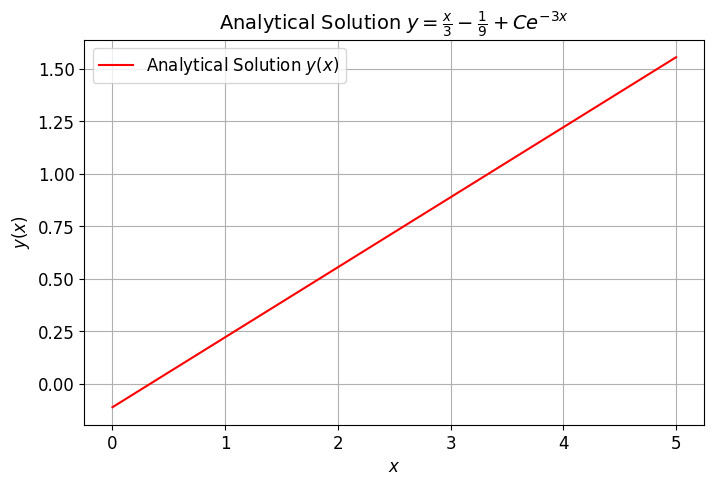

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain for x
x = np.linspace(0, 5, 500)

# Analytical solution based on the given Example Problem
C = 0  # Assuming y(0) = 0
y_analytical = (x / 3) - (1 / 9) + C * np.exp(-3 * x)

# Plot the solution
plt.figure(figsize=(8, 5))
plt.plot(x, y_analytical, label=r'Analytical Solution $y(x)$', color='red')
plt.title(r'Analytical Solution $y = \frac{x}{3} - \frac{1}{9} + Ce^{-3x}$', fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12, loc='upper left')
plt.show()

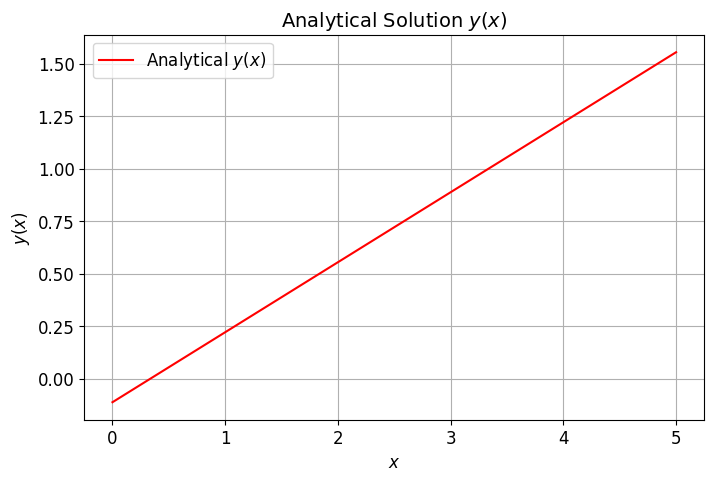

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain for x
x = np.linspace(0, 5, 500)

# Analytical solution for y(x) with C = 0
y_analytical = (x / 3) - (1 / 9)

# Set up the plot
plt.figure(figsize=(8, 5))

# Plot y(x)
plt.plot(x, y_analytical, label=r'Analytical $y(x)$', color='red')
plt.title(r'Analytical Solution $y(x)$', fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()

Epoch 0: Loss = [[7.624267]]
Epoch 500: Loss = [[0.00321256]]
Epoch 1000: Loss = [[0.00170497]]
Epoch 1500: Loss = [[0.00121613]]
Epoch 2000: Loss = [[0.00107873]]
Epoch 2500: Loss = [[0.0010239]]
Epoch 3000: Loss = [[0.00097765]]
Epoch 3500: Loss = [[0.00092404]]
Epoch 4000: Loss = [[0.00085228]]
Epoch 4500: Loss = [[0.00073463]]


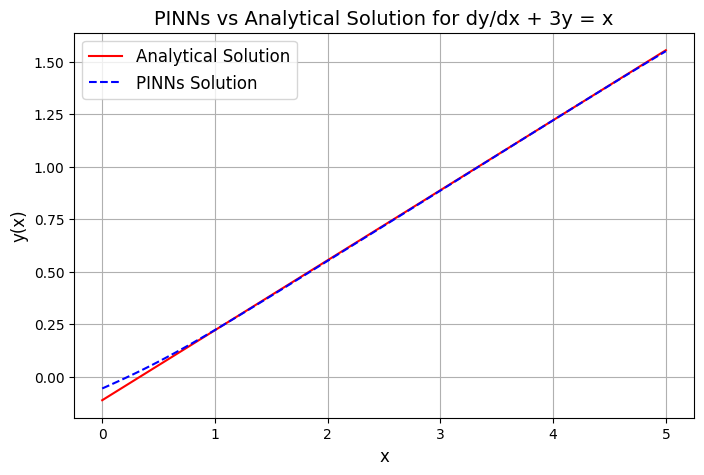

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the NN
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(64, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1, activation=None)  # Output layer: y(x)

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)

def loss_fn(model, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = model(x)  # y(x)
        dy_dx = tape.gradient(y, x, unconnected_gradients=tf.UnconnectedGradients.ZERO)  # dy/dx

        # Residual from the ODE: dy/dx + 3y = x
        res = dy_dx + 3 * y - x

        # Initial condition loss: y(0) = 0
        init_loss = tf.square(model(tf.constant([[0.0]], dtype=tf.float32)) - 0.0)

        # Weighted Loss
        loss = tf.reduce_mean(tf.square(res)) + 0.1 * init_loss  # 加權損失
    return loss


# Define training function
def train(model, x, epochs, optimizer):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = loss_fn(model, x)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        if epoch % 500 == 0:
            print(f'Epoch {epoch}: Loss = {loss.numpy()}')

# Create the model and optimizer
model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training Domain
x_train = tf.convert_to_tensor(np.linspace(0, 5, 100)[:, None], dtype=tf.float32)

# Train the model
train(model, x_train, epochs=5000, optimizer=optimizer)

# Prediction using the trained model
x_test = tf.convert_to_tensor(np.linspace(0, 5, 100)[:, None], dtype=tf.float32)
y_pred = model(x_test).numpy().flatten()

# Analytical Solution: y(x) = (x/3) - (1/9) + C
C = 0  # Assume C = 0 for the initial condition y(0) = 0
y_true = (x_test.numpy().flatten() / 3) - (1 / 9)

# Set up the plot
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_true, label='Analytical Solution', color='red')
plt.plot(x_test, y_pred, '--', label='PINNs Solution', color='blue')
plt.title("PINNs vs Analytical Solution for dy/dx + 3y = x", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12, loc="upper left")
plt.show()